In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/exams.csv")
df.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


In [26]:
df.shape

(345779, 15)

Text(0, 0.5, 'Predicted Age')

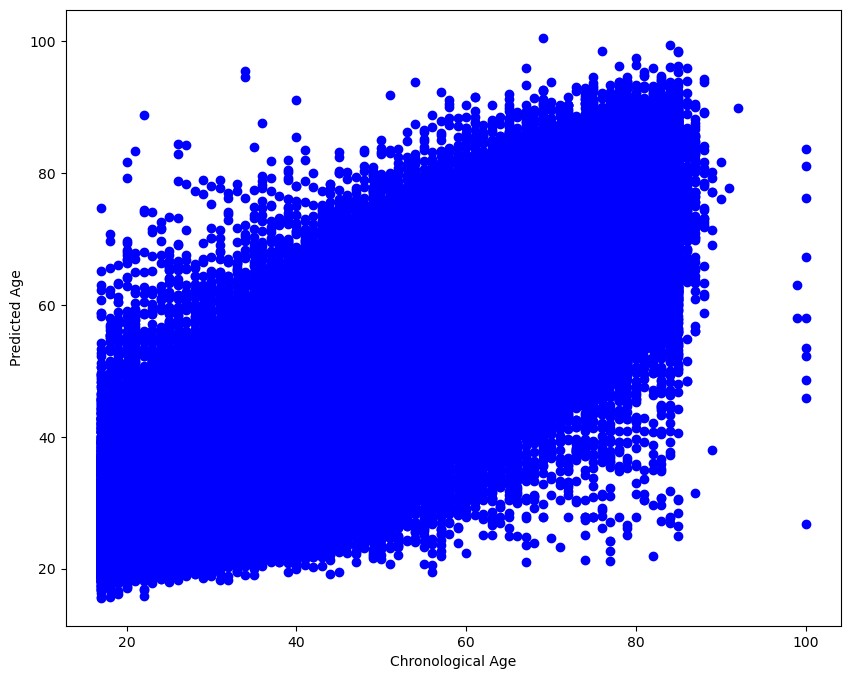

In [15]:
plt.figure(figsize=(10, 8))
norm_pop = df['normal_ecg']
plt.scatter(df[norm_pop]['age'], df[norm_pop]['nn_predicted_age'], color='blue')
# plt.scatter(df[~norm_pop]['age'], df[~norm_pop]['nn_predicted_age'], color = 'red', alpha=0.2)
plt.xlabel('Chronological Age')
plt.ylabel('Predicted Age')

In [18]:
# This is our population to work with in step 1
df_pop = df[
    (abs (df['age']- df['nn_predicted_age']) < 1) &
    (df['normal_ecg'])
 ]

In [19]:
df_pop.shape

(10923, 15)

In [20]:
df_pop.index

Index([    85,    203,    270,    289,    299,    307,    345,    389,    416,
          434,
       ...
       345495, 345524, 345572, 345585, 345589, 345594, 345628, 345641, 345715,
       345760],
      dtype='int64', length=10923)

In [22]:
df_pop['trace_file'].value_counts()

trace_file
exams_part16.hdf5    772
exams_part15.hdf5    669
exams_part13.hdf5    640
exams_part0.hdf5     639
exams_part7.hdf5     634
exams_part3.hdf5     633
exams_part10.hdf5    632
exams_part5.hdf5     629
exams_part11.hdf5    628
exams_part14.hdf5    623
exams_part6.hdf5     617
exams_part8.hdf5     611
exams_part2.hdf5     610
exams_part1.hdf5     606
exams_part12.hdf5    599
exams_part9.hdf5     598
exams_part4.hdf5     590
exams_part17.hdf5    193
Name: count, dtype: int64

In [25]:
df_pop[df_pop['trace_file'] == "exams_part16.hdf5"]['exam_id'].values

array([1683849, 1754825, 1689108, 1715430, 1796928, 1749457, 1716572,
       1777514, 1829535, 1907236, 1858490, 2027531, 1885949, 1964395,
       1872981, 1782073, 1723199, 1736365, 1695212, 1815611, 1972393,
       1830475, 1923890, 2056007, 1782637, 1724800, 1802068, 1786838,
       1775670, 1725024, 1681321, 1791587, 1805918, 1730729, 1817580,
       1731856, 1766464, 1780514, 1963844, 1919644, 1759936, 1699785,
       1904750, 1962421, 1921036, 1979666, 1802123, 1797655, 1724983,
       1699997, 1809976, 1717440, 1735887, 1741201, 1725452, 1715215,
       1764355, 1804052, 1780655, 1811272, 2047072, 1867042, 1836798,
       1868698, 1824143, 1742229, 1997736, 1789650, 1785217, 1733639,
       1823149, 1716960, 1701871, 1722184,  943176, 1869455, 1791485,
       1860131, 1823172, 1788160, 1728513, 1737303, 1794312, 1746306,
       1770013, 1773967, 1811736, 1809302, 1744205, 1715838, 1786977,
       1745474, 1698340, 1818490, 1745645, 1724189, 1843550, 1861751,
       1898095, 1933

Text(0, 0.5, 'Predicted Age')

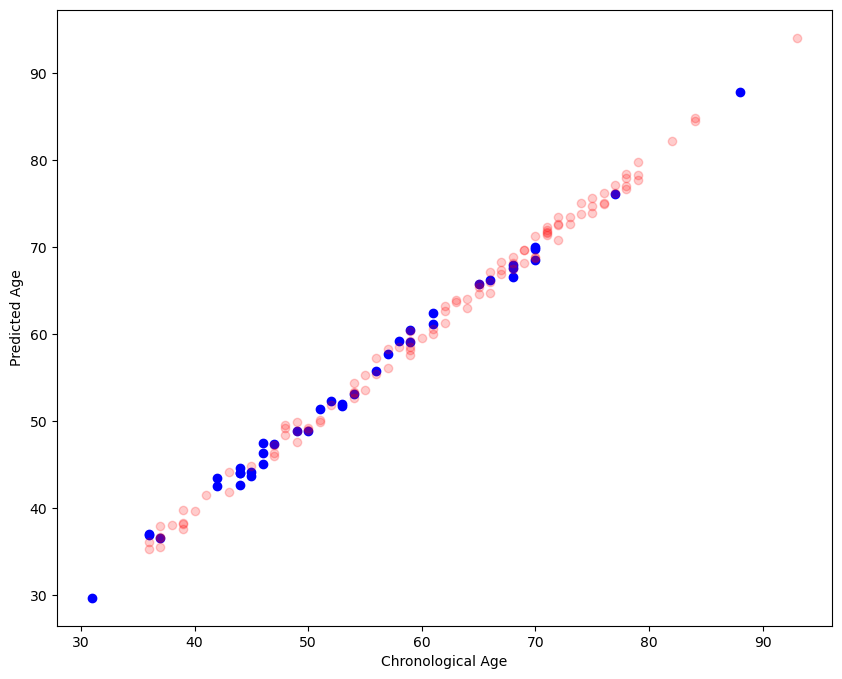

In [25]:
plt.figure(figsize=(10, 8))
norm_pop = df_pop['normal_ecg']
plt.scatter(df_pop[norm_pop]['age'], df_pop[norm_pop]['nn_predicted_age'], color='blue')
plt.scatter(df_pop[~norm_pop]['age'], df_pop[~norm_pop]['nn_predicted_age'], color='red', alpha=0.2)

plt.xlabel('Chronological Age')
plt.ylabel('Predicted Age')

In [3]:
df[df['normal_ecg']]['AF'].unique()

array([False])

<Axes: >

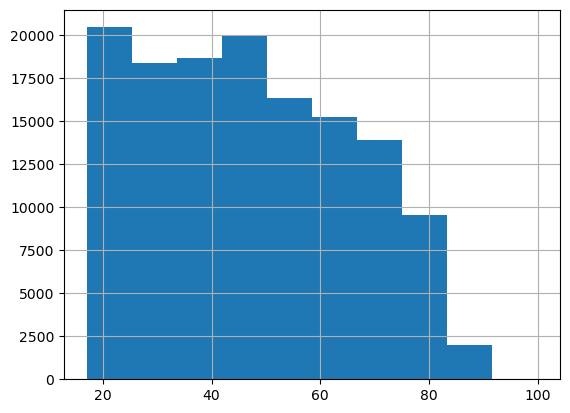

In [4]:
df[df['normal_ecg']]['age'].hist()

<Axes: >

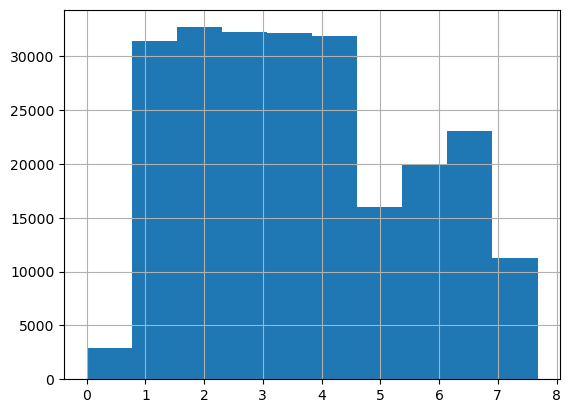

In [5]:
df['timey'].hist()

<Axes: >

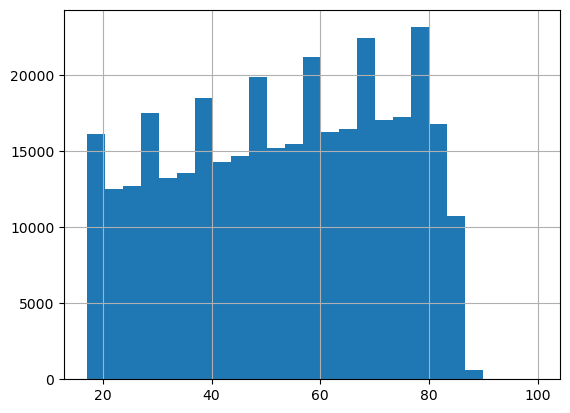

In [6]:
df['age'].hist(bins=25)

In [7]:
df['normal_ecg'].value_counts()

normal_ecg
False    211122
True     134657
Name: count, dtype: int64

<Axes: >

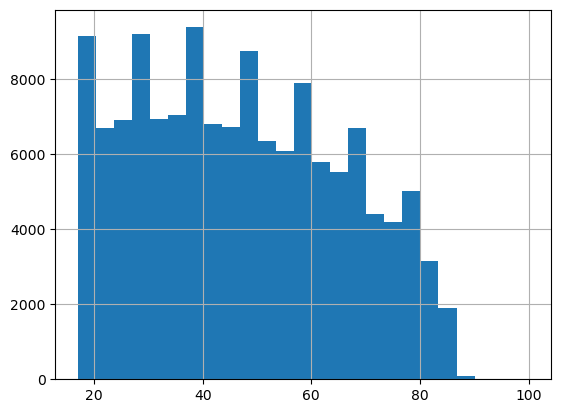

In [8]:
df[df['normal_ecg']]['age'].hist(bins=25)

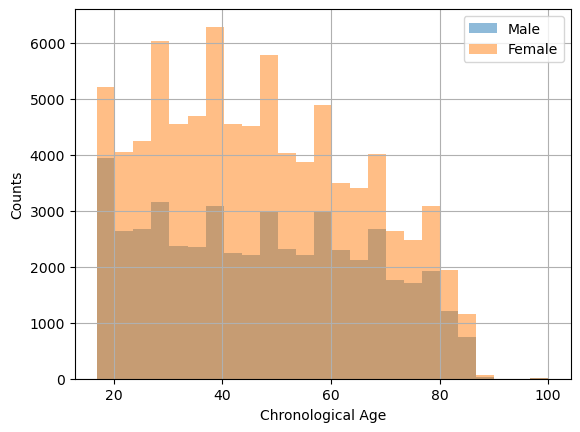

In [9]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['age'].hist(bins=25, alpha=0.5, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['age'].hist(bins=25, alpha=0.5, label='Female')
plt.xlabel("Chronological Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

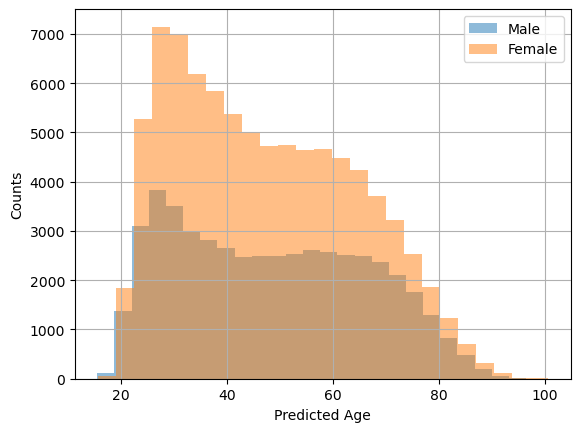

In [10]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, label='Female')
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

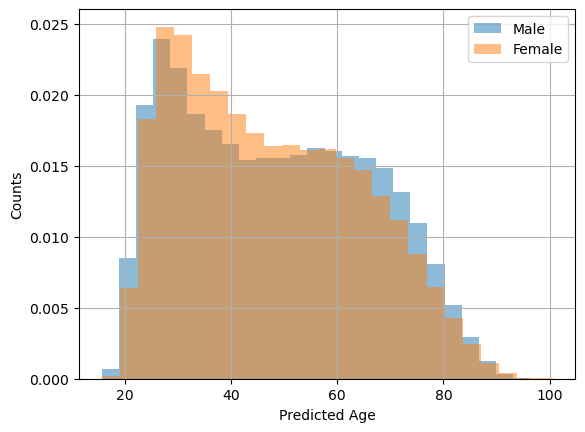

In [11]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, density=True, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, density=True, label='Female')
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

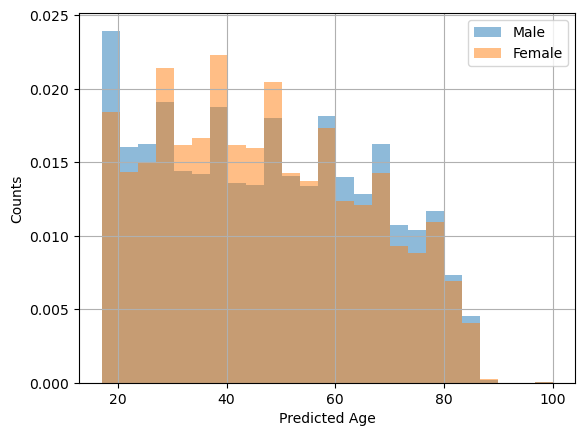

In [12]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['age'].hist(bins=25, alpha=0.5, density=True, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['age'].hist(bins=25, alpha=0.5, density=True, label='Female')
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [13]:
df['is_male'].value_counts()

is_male
False    206576
True     139203
Name: count, dtype: int64

In [14]:
df['is_male'].value_counts(normalize=True)

is_male
False    0.597422
True     0.402578
Name: proportion, dtype: float64

# To read the IDs from the file

In [10]:
import h5py
filename = "data/exams.hdf5"

with h5py.File(filename, "r") as f:
    ids_key = list(f.keys())[0]

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data_ = list(f[ids_key])

    # preferred methods to get dataset values:
    ds_arr_ = f[ids_key][()]  # returns as a numpy array

# To read the data from the file

In [15]:
import h5py
filename = "data/exams_part0.hdf5"

with h5py.File(filename, "r") as f:
    data_key = list(f.keys())[1]

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[data_key])

    # preferred methods to get dataset values:
    ds_arr = f[data_key][()]  # returns as a numpy array


Keys: <KeysViewHDF5 ['exam_id', 'tracings']>
<class 'h5py._hl.dataset.Dataset'>


In [16]:
ds_arr['exam_id']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
len(data)

20001

In [18]:
with h5py.File(filename, "r") as f:
    keys = list(f.keys())
    for key in keys:
        data = list(f[a_group_key])
        print(len(data))


20001
20001


In [20]:
with h5py.File(filename, 'w') as f:
    f['dataset'] = range(10)

<Closed HDF5 file>

In [1]:
import numpy as np
from tempfile import TemporaryFile
outfile = TemporaryFile()

In [2]:
arr = np.array([x for x in range(3)])
# np.save(outfile, arr)

In [7]:
_ = outfile.seek(0) # Only needed to simulate closing & reopening file

np.load(outfile)

array([0, 1, 2])

In [3]:
with open('test.npy', 'wb') as f:
    np.save(f, arr)

with open('test.npy', 'rb') as f:
    a = np.load(f)
a

array([0, 1, 2])

In [8]:
isinstance(a, np.ndarray)

True

In [6]:
s = 'str'
isinstance(s, str)

True

In [ ]:
import h5py
import numpy as np

# Create a sample array
data = np.random.rand(100, 200)

# Save it to an HDF5 file
with h5py.File('output.h5', 'w') as f:
    f.create_dataset('my_array', data=data)
